this codesegment accesses everything and creates the tables

In [3]:
#look at the mask data
import pickle
import numpy as np
import pandas as pd
import os.path as osp
import os.path as osp
import sys
import os
import h5py
import os.path as osp

threshold = "0.3"
final_precision = []
final_recall = []
final_f1 = []
final_boxes = []
final_centers = []
 # get the result matricies
        # result = {"precision": all_precision,
        #             "recall": all_recall,
        #             "f1": all_f1,
        #             "box_iou": all_boxes
        #             }
                    
# Access the contents
filepath = osp.join("/media/ekoller/T7/center_statistics", threshold, "ref_obj_statistics.pkl")
with open(filepath, 'rb') as file:
    result = pickle.load(file)

final_precision.append(result.get("precision", None))
final_recall.append(result.get("recall", None))
final_f1.append(result.get("f1", None))
final_boxes.append(result.get( "iou_boxes", None))
final_centers.append(result.get("mean_center_difference", None))
# print(result.get("precision", None))
# print(result.get("recall", None))
# print(result.get("f1", None))
# print(result.get( "iou_boxes", None))
# print(result.get("mean_center_difference", None))
# final_precision.extend(result.get("precision", None))
# final_recall.extend(result.get("recall", None))
# final_f1.extend(result.get("f1", None))
# final_boxes.extend(result.get("box_iou", None))
# final_centers.extend(result.get("box_iou", None))



# filepath = osp.join("/media/ekoller/T7/center_statistics", threshold, "statistics_object_prediction.60.120.pkl")
# with open(filepath, 'rb') as file:
#     result = pickle.load(file)

# final_precision.extend(result.get("precision", None))
# final_recall.extend(result.get("recall", None))
# final_f1.extend(result.get("f1", None))
# final_boxes.extend(result.get("box_iou", None))
# final_centers.extend(result.get("box_iou", None))

# filepath = osp.join("/media/ekoller/T7/center_statistics", threshold, "statistics_object_prediction.120.180.pkl")
# with open(filepath, 'rb') as file:
#     result = pickle.load(file)

# final_precision = result.get("precision", None)
# #print(final_precision)
# final_recall = result.get("recall", None)
# final_f1 = result.get("f1", None)
# final_boxes = result.get("iou_boxes", None)
# final_centers =result.get("mean_center_difference", None)




# final_precision = np.mean(final_precision, axis=0)
# final_recall = np.mean(final_recall, axis=0)
# final_f1= np.mean(final_f1, axis= 0)
# final_boxes = np.mean(final_boxes, axis= 0)
# final_centers = np.mean(final_centers,axis = 0)



minimum_votes = [1,2,3,4,5,6] #[2] #[1,2,3,4,5,6,7,8,9]
minimum_points = [5,10,15,20,25,30,35,40,45,50,55,60] #[35] #[5,10,15,20,25,30,35,40,45,50,60,70,80,90]


# Create a DataFrame for each metric
df_precision = pd.DataFrame(final_precision[0], index=minimum_points, columns=minimum_votes)
df_recall = pd.DataFrame(final_recall[0], index=minimum_points, columns=minimum_votes)
df_f1 = pd.DataFrame(final_f1[0], index=minimum_points, columns=minimum_votes)
df_boxes = pd.DataFrame(final_boxes[0], index=minimum_points, columns=minimum_votes)
df_centers = pd.DataFrame(final_centers[0], index=minimum_points, columns=minimum_votes)

# Set index and column labels for better readability
df_precision.index.name = 'Poitns'
df_precision.columns.name = 'Votes'

df_recall.index.name = 'Points'
df_recall.columns.name = 'Votes'

df_f1.index.name = 'Poitns'
df_f1.columns.name = 'Votes'

df_boxes.index.name = 'Poitns'
df_boxes.columns.name = 'Votes'

df_centers.index.name = 'Poitns'
df_centers.columns.name = 'Votes'

# Set Pandas options to display without wrapping
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', None)        # Make display width flexible
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping


# Display the tables
print("Precision")
print(df_precision)
print("\nRecall")
print(df_recall)
print("\nF1")
print(df_f1)
print("\nBox IoU")
print(df_boxes)
print("\nCenter Distance")
print(df_centers)





# Find the location (index and column) of the maximum F1 score
max_f1_value = df_f1.max().max()  # Get the maximum F1 score
max_f1_location = df_f1.stack().idxmax()  # Get the corresponding index (threshold) and column (k-means)

# Extract the threshold and k-value
best_threshold, best_k_value = max_f1_location

# Print the results
print(f"The highest F1 score is {max_f1_value:.4f}, achieved at threshold {best_threshold} and K-Means value {best_k_value}.")


Precision
Votes          1         2         3         4         5         6
Poitns                                                            
5       0.650360  0.692121  0.733763  0.769828  0.793503  0.789343
10      0.668803  0.708489  0.748732  0.787310  0.813678  0.812933
15      0.675813  0.712849  0.750836  0.788479  0.815773  0.815088
20      0.686534  0.718170  0.754789  0.792564  0.816922  0.816083
25      0.691688  0.719840  0.755985  0.793083  0.817567  0.816596
30      0.699204  0.724510  0.758314  0.794499  0.818607  0.817371
35      0.704209  0.728334  0.761445  0.796178  0.819922  0.818367
40      0.708409  0.731531  0.762966  0.797386  0.821428  0.820224
45      0.713428  0.733005  0.763345  0.797122  0.820338  0.820103
50      0.719123  0.734972  0.765138  0.798151  0.820739  0.820808
55      0.722915  0.737003  0.766117  0.798700  0.821742  0.823168
60      0.726419  0.738585  0.767743  0.799860  0.823375  0.823981

Recall
Votes          1         2         3        

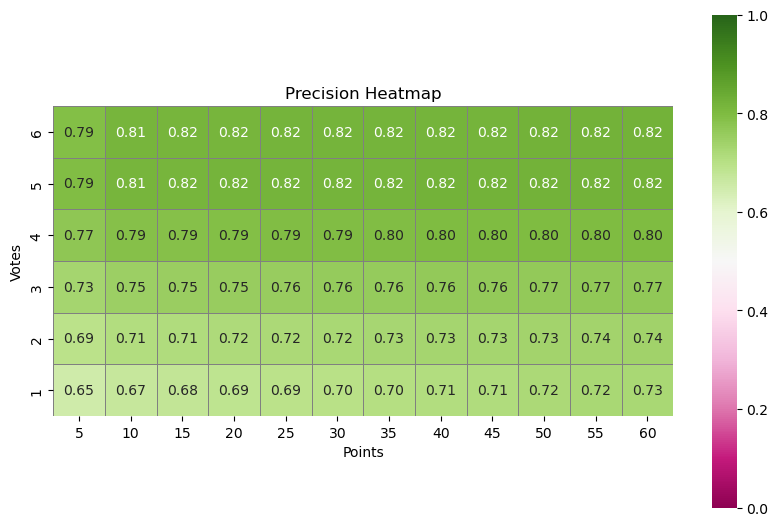

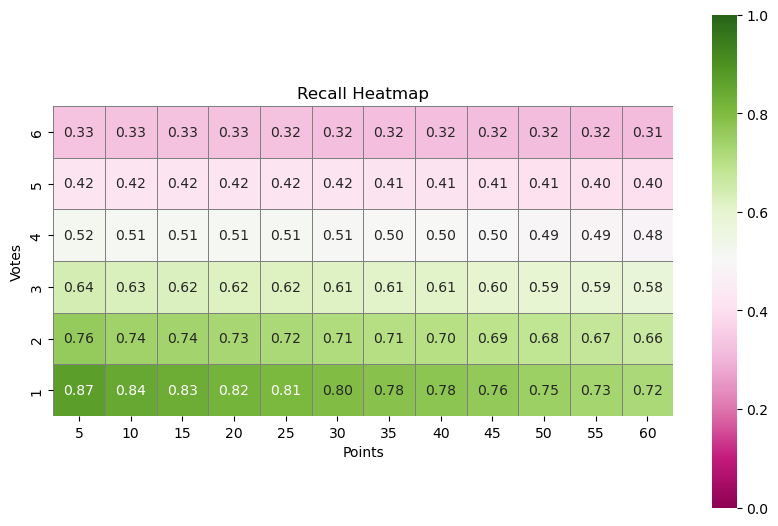

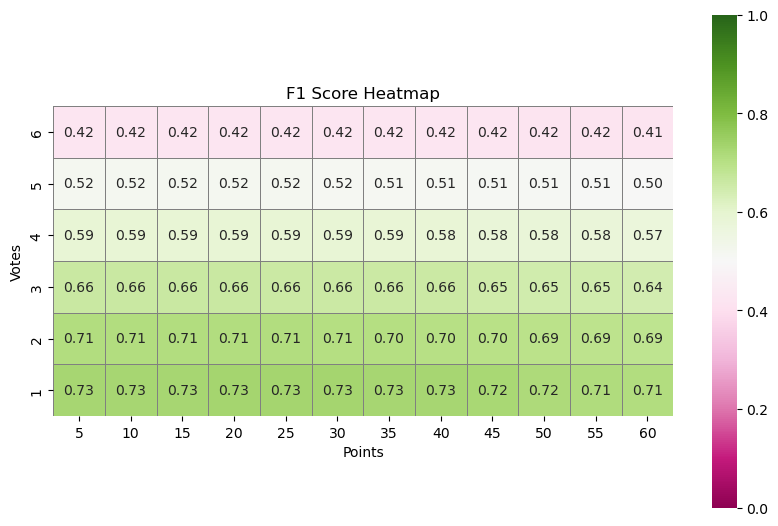

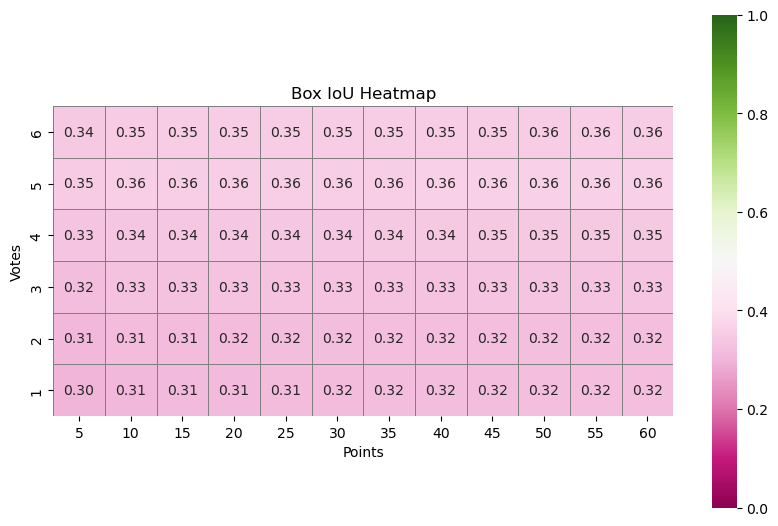

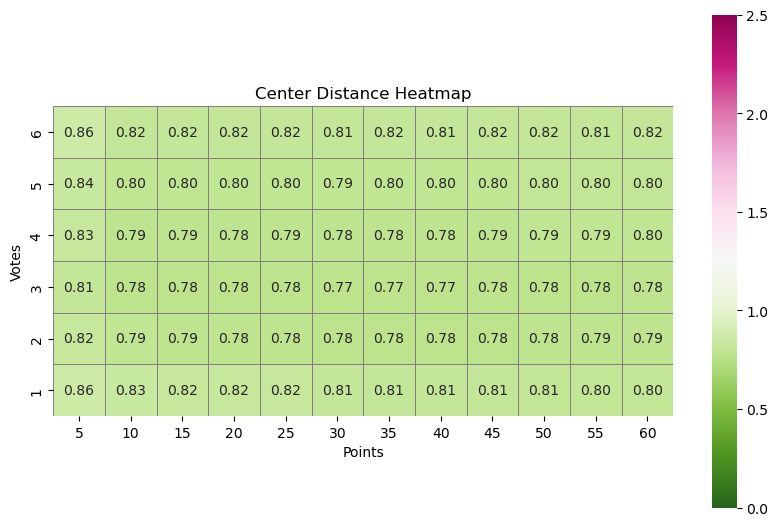

In [17]:
#this section turnes the whole thing into a heat map

import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(dataframe, title):
    plt.figure(figsize=(10, 8))
    # Transpose the DataFrame to flip axes
    sns.heatmap(dataframe.T, annot=True, fmt=".2f", cmap='PiYG', 
                cbar=True, square=True, linewidths=0.5, linecolor='gray', 
                vmin=0, vmax=1, cbar_kws={"shrink": 0.8})  # Adjust shrink here
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel('Points')  # X-axis represents the original rows
    plt.ylabel('Votes')   # Y-axis represents the original columns
    
    # Invert the y-axis to position the corner at the top-left
    plt.gca().invert_yaxis()
    
    plt.show()

def plot_heatmap_distance(dataframe, title):
    plt.figure(figsize=(10, 8))
    # Transpose the DataFrame to flip axes
    sns.heatmap(dataframe.T, annot=True, fmt=".2f", cmap='PiYG_r',  # Reverse colormap
                cbar=True, square=True, linewidths=0.5, linecolor='gray', 
                vmin=0, vmax=2.5, cbar_kws={"shrink": 0.8})  # Adjust shrink here
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel('Points')  # X-axis represents the original rows
    plt.ylabel('Votes')   # Y-axis represents the original columns
    
    # Invert the y-axis to position the corner at the top-left
    plt.gca().invert_yaxis()
    
    plt.show()

plot_heatmap(df_precision, 'Precision Heatmap')
plot_heatmap(df_recall, 'Recall Heatmap')
plot_heatmap(df_f1, 'F1 Score Heatmap')
plot_heatmap(df_boxes, 'Box IoU Heatmap')
plot_heatmap_distance(df_centers, 'Center Distance Heatmap')

In [8]:
final_precision_2 = []
final_recall_2 = []
final_f1_2 = []
# Access the contents
# filepath = "/media/ekoller/T7/Results_2/avg/statistics_segmentation_0to60.pkl"
# with open(filepath, 'rb') as file:
#     result = pickle.load(file)

# cosine_iou_metric_precision = result.get("cosine_iou_metric_precision", None)
# cosine_iou_metric_recall = result.get("cosine_iou_metric_recall", None)
# cosine_metric_f1 = result.get("cosine_mectric_f1", None)
# final_precision_2.extend(cosine_iou_metric_precision)
# final_recall_2.extend(cosine_iou_metric_recall)
# final_f1_2.extend(cosine_metric_f1)


filepath = "/media/ekoller/T7/Results_2/avg/statistics_segmentation_tryout_median_120.180.pkl"
with open(filepath, 'rb') as file:
    result = pickle.load(file)

cosine_iou_metric_precision = result.get("cosine_iou_metric_precision", None)
cosine_iou_metric_recall = result.get("cosine_iou_metric_recall", None)
cosine_metric_f1 = result.get("cosine_mectric_f1", None)
final_precision_2.extend(cosine_iou_metric_precision)
final_recall_2.extend(cosine_iou_metric_recall)
final_f1_2.extend(cosine_metric_f1)



# # Print to check the values
# print("Cosine IoU Metric Precision:", np.mean(cosine_iou_metric_precision, axis=0))
# print("Cosine IoU Metric Recall:", np.mean(cosine_iou_metric_recall, axis=0))
# print("Cosine Metric F1:", np.mean(cosine_metric_f1, axis= 0))

final_precision_2 = np.mean(final_precision_2, axis=0)
final_recall_2 = np.mean(final_recall_2, axis=0)
final_f1_2= np.mean(final_f1_2, axis= 0)

k_means= [1,3,5,7,9,11,13]
threshold= [-0.1,-0.2,-0.3,-0.4]

# Create a DataFrame for each metric
df_precision = pd.DataFrame(final_precision_2, index=threshold, columns=k_means)
df_recall = pd.DataFrame(final_recall_2, index=threshold, columns=k_means)
df_f1 = pd.DataFrame(final_f1_2, index=threshold, columns=k_means)




# Set index and column labels for better readability
df_precision.index.name = 'Threshold'
df_precision.columns.name = 'K-Means'

df_recall.index.name = 'Threshold'
df_recall.columns.name = 'K-Means'

df_f1.index.name = 'Threshold'
df_f1.columns.name = 'K-Means'

# Set Pandas options to display without wrapping
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', None)        # Make display width flexible
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping


# Display the tables
print("Precision AVG")
print(df_precision)
print("\nRecall AVG")
print(df_recall)
print("\nF1 AVG")
print(df_f1)



# Find the location (index and column) of the maximum F1 score
max_f1_value = df_f1.max().max()  # Get the maximum F1 score
max_f1_location = df_f1.stack().idxmax()  # Get the corresponding index (threshold) and column (k-means)

# Extract the threshold and k-value
best_threshold, best_k_value = max_f1_location

# Print the results
print(f"The highest F1 score is {max_f1_value:.4f}, achieved at threshold {best_threshold} and K-Means value {best_k_value}.")


Precision AVG
K-Means          1         3         5         7         9        11        13
Threshold                                                                     
-0.1       0.574273  0.572028  0.561454  0.581675  0.568803  0.54906  0.538554
-0.2       0.574273  0.572028  0.561454  0.581675  0.568803  0.54906  0.538554
-0.3       0.574273  0.572028  0.561454  0.581675  0.568803  0.54906  0.538554
-0.4       0.574273  0.572028  0.561454  0.581675  0.568803  0.54906  0.538554

Recall AVG
K-Means          1         3         5         7         9         11        13
Threshold                                                                      
-0.1       0.581034  0.572586  0.559801  0.568031  0.563237  0.546342  0.534263
-0.2       0.581034  0.572586  0.559801  0.568031  0.563237  0.546342  0.534263
-0.3       0.581034  0.572586  0.559801  0.568031  0.563237  0.546342  0.534263
-0.4       0.581034  0.572586  0.559801  0.568031  0.563237  0.546342  0.534263

F1 AVG
K-Means     

In [2]:
#look at the mask data
import pickle
import os.path as osp
import os.path as osp
import sys
ws_dir = '/local/home/ekoller/BT'
print(ws_dir)
sys.path.append(ws_dir)
from utils import evaluation, scan3r


data_dir ='/local/home/ekoller/R3Scan'
data_path=  osp.join(data_dir, "Results","mask_metric/mask_metric.pkl" )


# with open(data_path, 'rb') as file:
#     data = pickle.load(file)  # This loads the dictionary from the pickle file

# # Assuming 'data' is a dictionary where keys are scan IDs and values are numbers
# # Sort by the values in descending order
# sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)
# ref_ids = []
# # Print the sorted scan IDs and their corresponding numbers
# for scan_id, number in sorted_data:
#     ref_id = scan3r.get_reference_id()
#     ref_ids.append(ref_id)
#     print(f"Scan ID: {scan_id}, Number: {number} , Reference Id{ref_id}")

scan_id = "0cac75f0-8d6f-2d13-8d86-371deca33bb4"
 #access gt pointcenters
pklfile = osp.join(data_dir, 'files', 'orig', 'data', '{}.pkl'.format(scan_id))

with open(pklfile, "rb") as f:
    # Load the data from the pickle file
    data = pickle.load(f)
    
# extract object points and IDs from the pickle data
gt_ids = data['objects_id']
gt_centers = data["object_centers"]
gt_boxes = data['bounding_boxes']

print(gt_ids)
print(gt_centers)
print(gt_boxes)




/local/home/ekoller/BT
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
{1.0: array([ 0.48778215, -2.2227864 , -1.311532  ], dtype=float32), 2.0: array([-0.8165765 , -3.03687   , -0.78502166], dtype=float32), 3.0: array([-1.1759152 , -3.328752  ,  0.17441119], dtype=float32), 4.0: array([-0.533804  , -4.0798655 , -0.54956096], dtype=float32), 5.0: array([-2.0876634, -2.4069846, -0.0249024], dtype=float32), 6.0: array([-1.980719  , -2.4873707 , -0.05275032], dtype=float32), 7.0: array([-1.7865872 , -2.677355  , -0.23320776], dtype=float32), 8.0: array([-1.9496969 , -1.5317907 ,  0.31452855], dtype=float32), 9.0: array([-1.7468864 , -1.7880152 , -0.75204885], dtype=float32), 10.0: array([-0.96203333, -0.70390165, -0.38595074], dtype=float32), 11.0: array([-0.7046183 ,  0.2868

In [5]:
  #return an object with the structure:scan_id: frame_number: frame_obj_id: matched id
import os
import h5py
import os.path as osp
def check_for_id_zero(matching_data):
    # Iterate through each frame in the matching data
    for frame_idx, matches in matching_data.items():
        # Check if any object is mapped to 0 in this frame
        for obj_id, mapped_id in matches.items():
            if mapped_id == 0:
                print(f"Object ID {obj_id} in frame {frame_idx} is mapped to ID 0.")
                return True  # If found, exit early

    print("No object is mapped to ID 0.")
    return False

def read_matching_data( scan_id):
    # get the file and iterate through everything to create an object
    matchfile = osp.join("/media/ekoller/T7/Predicted_Matches", scan_id + ".h5")
    with h5py.File(matchfile, 'r') as hdf_file:
        loaded_matches = {}
        
        # Iterate through frame indices
        for frame_idx in hdf_file.keys():
            matches = {}
            
            # Access the group for each frame index
            frame_group = hdf_file[frame_idx]
            
            # Load the frame_id -> obj mappings
            for frame_id in frame_group.keys():
                obj = frame_group[frame_id][()]
                matches[frame_id] = int(obj)  # Convert back to int
            
            loaded_matches[frame_idx] = matches 

    return loaded_matches


matching_data = read_matching_data("fcf66d8a-622d-291c-8429-0e1109c6bb26")
print("matching data", matching_data["000000"])
found_id_zero = check_for_id_zero(matching_data)



matching data {'1': 14, '2': 1, '3': 29, '4': 29, '5': 4, '6': 1}
No object is mapped to ID 0.
